In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
data = pd.read_csv("C:\\Users\\prasanna\\OneDrive\\Desktop\\4thsem\\Part B\\3_cart\\CART_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


EDA

In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

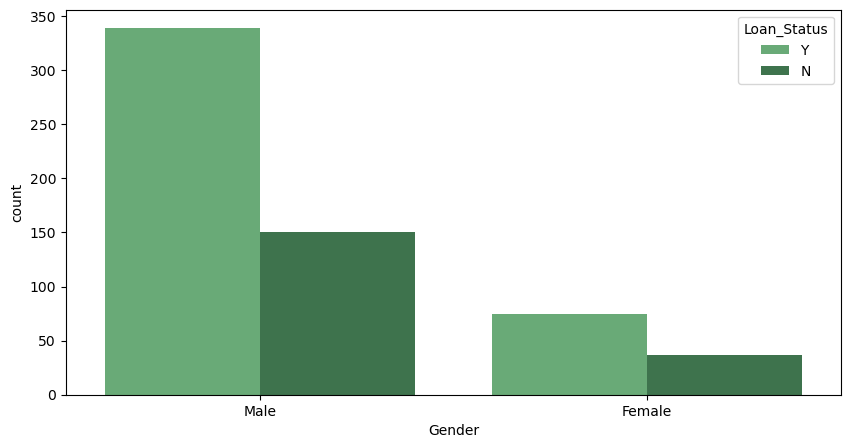

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',data=data,hue='Loan_Status',palette='Greens_d')
plt.show()

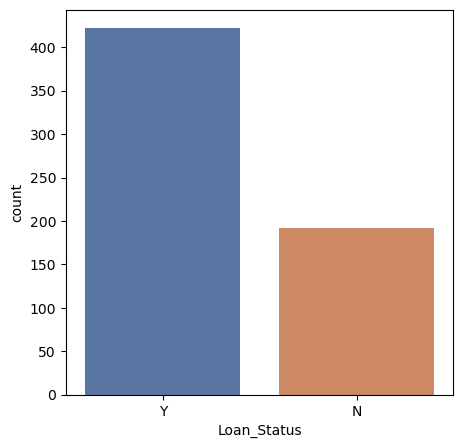

In [10]:
plt.figure(figsize=(5,5))
sns.countplot(x='Loan_Status',data=data,palette='deep')
plt.show()

In [19]:
label_encoder = preprocessing.LabelEncoder()
data['Loan_Status']= label_encoder.fit_transform(data['Loan_Status'])
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['Education']= label_encoder.fit_transform(data['Education'])
data['Married']= label_encoder.fit_transform(data['Married'])
data['Dependents']= label_encoder.fit_transform(data['Dependents'])
data['Self_Employed']= label_encoder.fit_transform(data['Self_Employed'])
data['ApplicantIncome']= label_encoder.fit_transform(data['ApplicantIncome'])
data['CoapplicantIncome']= label_encoder.fit_transform(data['CoapplicantIncome'])
data['Loan_Amount_Term']= label_encoder.fit_transform(data['Loan_Amount_Term'])
data['LoanAmount']=label_encoder.fit_transform(data['LoanAmount'])
data['Credit_History']= label_encoder.fit_transform(data['Credit_History'])
data['Property_Area']= label_encoder.fit_transform(data['Property_Area'])
data['Loan_ID']=label_encoder.fit_transform(data['Loan_ID'])

In [20]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,203,8,1,2,1
1,1,1,1,1,0,0,306,60,81,8,1,0,0
2,2,1,1,0,0,1,139,0,26,8,1,2,1
3,3,1,1,0,1,0,90,160,73,8,1,2,1
4,4,1,0,0,0,0,381,0,94,8,1,2,1


In [21]:
y = data['Loan_Status']
X = data.drop(['Loan_Status'], axis=1)

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
ytrain

90     1
533    0
452    0
355    1
266    1
      ..
277    1
9      0
359    1
192    0
559    1
Name: Loan_Status, Length: 491, dtype: int64

In [23]:
model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)
# model = DecisionTreeClassifier()
model = model.fit(xtrain, ytrain)

[Text(0.4411764705882353, 0.9, 'Credit_History <= 0.5\ngini = 0.438\nsamples = 491\nvalue = [159, 332]\nclass = 0'),
 Text(0.17647058823529413, 0.7, 'ApplicantIncome <= 291.5\ngini = 0.128\nsamples = 73\nvalue = [68, 5]\nclass = 1'),
 Text(0.11764705882352941, 0.5, 'gini = 0.0\nsamples = 41\nvalue = [41, 0]\nclass = 1'),
 Text(0.23529411764705882, 0.5, 'ApplicantIncome <= 335.0\ngini = 0.264\nsamples = 32\nvalue = [27, 5]\nclass = 1'),
 Text(0.11764705882352941, 0.3, 'Loan_ID <= 279.0\ngini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = 1'),
 Text(0.058823529411764705, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = 0'),
 Text(0.17647058823529413, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = 1'),
 Text(0.35294117647058826, 0.3, 'LoanAmount <= 198.0\ngini = 0.142\nsamples = 26\nvalue = [24, 2]\nclass = 1'),
 Text(0.29411764705882354, 0.1, 'gini = 0.083\nsamples = 23\nvalue = [22, 1]\nclass = 1'),
 Text(0.4117647058823529, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]

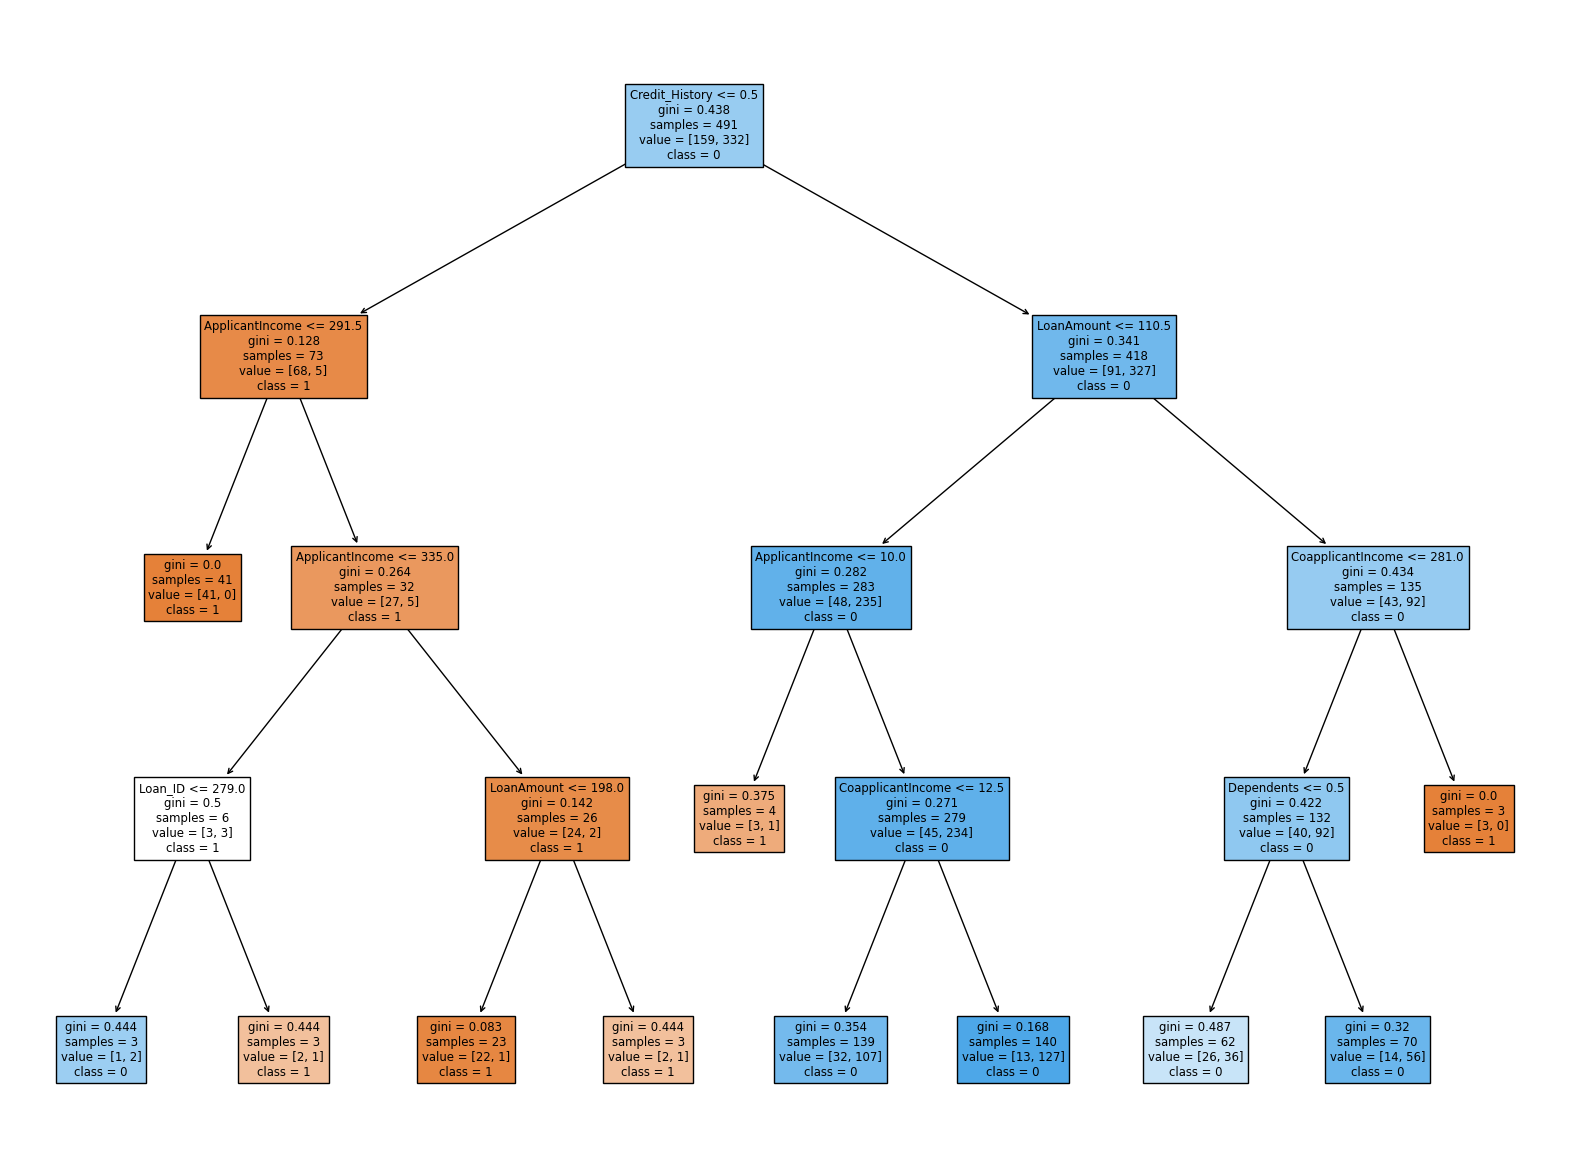

In [24]:
dt_feature_names = list(xtrain.columns)
dt_target_names = [str(s) for s in ytrain.unique()]
plt.figure(figsize = (20,15))
plot_tree(model,feature_names = dt_feature_names, class_names = dt_target_names, filled = True)

In [14]:
y_pred_test = model.predict(xtest)
print(confusion_matrix(ytest, y_pred_test))
print(classification_report(ytest, y_pred_test))

[[18 15]
 [ 6 84]]
              precision    recall  f1-score   support

           0       0.75      0.55      0.63        33
           1       0.85      0.93      0.89        90

    accuracy                           0.83       123
   macro avg       0.80      0.74      0.76       123
weighted avg       0.82      0.83      0.82       123



In [15]:
y_pred_train = model.predict(xtrain)
print(confusion_matrix(ytrain, y_pred_train))
print(classification_report(ytrain, y_pred_train))

[[ 86  73]
 [ 19 313]]
              precision    recall  f1-score   support

           0       0.82      0.54      0.65       159
           1       0.81      0.94      0.87       332

    accuracy                           0.81       491
   macro avg       0.81      0.74      0.76       491
weighted avg       0.81      0.81      0.80       491

